# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

print(weather_api_key)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

7e95c280e82e44c119e6f129ea764f93


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_api_key

'7e95c280e82e44c119e6f129ea764f93'

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=7e95c280e82e44c119e6f129ea764f93&units=imperial&q=


In [5]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
date= []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)
        
        date.append(datetime.datetime.fromtimestamp(response_json['dt']).strftime("%A, %d %B %Y %I:%M%p"))

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")


City Name: mataura, City ID: 6201424
City Name: gat, City ID: 293842
City Name: san patricio, City ID: 4726521
City Name: pedernales, City ID: 3495137
That record does not exist, searching for next record...
City Name: arraial do cabo, City ID: 3471451
City Name: lorengau, City ID: 2092164
City Name: cape town, City ID: 3369157
City Name: port alfred, City ID: 964432
City Name: kachug, City ID: 2023333
City Name: garowe, City ID: 58933
That record does not exist, searching for next record...
City Name: aklavik, City ID: 5882953
City Name: pedasi, City ID: 3703239
City Name: meulaboh, City ID: 1214488
City Name: ilulissat, City ID: 3423146
City Name: victoria, City ID: 1819729
City Name: byron bay, City ID: 2172880
City Name: clyde river, City ID: 5924351
City Name: sri aman, City ID: 1735799
That record does not exist, searching for next record...
City Name: bluff, City ID: 2206939
City Name: busselton, City ID: 2075265
City Name: punta arenas, City ID: 3874787
City Name: new norfolk, 

City Name: highland springs, City ID: 4764127
City Name: horizontina, City ID: 3461659
City Name: fengzhen, City ID: 2037391
City Name: wewak, City ID: 2083537
City Name: tobermory, City ID: 6167125
City Name: prince albert, City ID: 6113335
City Name: totoral, City ID: 3927023
City Name: ulladulla, City ID: 2145554
City Name: yellowknife, City ID: 6185377
City Name: mao, City ID: 2514301
City Name: nikolskoye, City ID: 546105
City Name: acatlan, City ID: 3533445
City Name: kutum, City ID: 371745
City Name: santa rosa, City ID: 1687894
City Name: jutai, City ID: 3663693
City Name: sinnamary, City ID: 3380290
City Name: yenagoa, City ID: 2318123
City Name: waitati, City ID: 2179825
City Name: goderich, City ID: 5962442
City Name: moerai, City ID: 4034188
City Name: puerto escondido, City ID: 3520994
That record does not exist, searching for next record...
City Name: seoul, City ID: 1835848
City Name: katsuura, City ID: 2112309
City Name: katangli, City ID: 2122783
City Name: padang, Cit

City Name: mecca, City ID: 104515
City Name: micheweni, City ID: 153955
City Name: paramonga, City ID: 3933024
City Name: manzhouli, City ID: 2035836
City Name: conceicao do araguaia, City ID: 3401845
City Name: minsk, City ID: 625144
City Name: bengkulu, City ID: 1649150
City Name: yarada, City ID: 1252783
City Name: kikerino, City ID: 548763
City Name: santa ines, City ID: 3389609
City Name: bay roberts, City ID: 5895424
City Name: yei, City ID: 363619
City Name: djambala, City ID: 2260401
City Name: businga, City ID: 217637
City Name: novobirilyussy, City ID: 1508260
City Name: carutapera, City ID: 3402648
City Name: armizonskoye, City ID: 1511382
That record does not exist, searching for next record...
City Name: brae, City ID: 2654970
City Name: mezen, City ID: 527321
City Name: linguere, City ID: 2249281
City Name: arkhangelskoye, City ID: 580993
City Name: yerbogachen, City ID: 2012956
City Name: shelburne, City ID: 6145890
City Name: solenzo, City ID: 2355404
That record does n

In [8]:
datetime.datetime.fromtimestamp(response_json['dt']).strftime("%A, %d %B %Y %I:%M%p")

'Monday, 17 May 2021 01:09PM'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
date

['Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:05PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:06PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:03PM',
 'Monday, 17 May 2021 01:04PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:02PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday, 17 May 2021 01:07PM',
 'Monday

In [10]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list, "Date": date})


In [11]:
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed,Date
0,6201424,Mataura,NZ,-46.1927,168.8643,41.00,69,78,18.99,"Monday, 17 May 2021 01:07PM"
1,293842,Kiryat Gat,IL,31.6100,34.7642,71.19,5,30,3.00,"Monday, 17 May 2021 01:07PM"
2,4726521,San Patricio,US,28.0170,-97.5169,85.64,74,75,16.11,"Monday, 17 May 2021 01:07PM"
3,3495137,Pedernales,DO,18.0384,-71.7440,85.77,60,64,9.78,"Monday, 17 May 2021 01:07PM"
4,3471451,Arraial do Cabo,BR,-22.9661,-42.0278,82.40,54,0,3.44,"Monday, 17 May 2021 01:07PM"


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

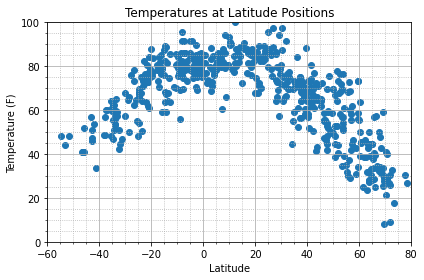

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.jpeg")

## Latitude vs. Humidity Plot

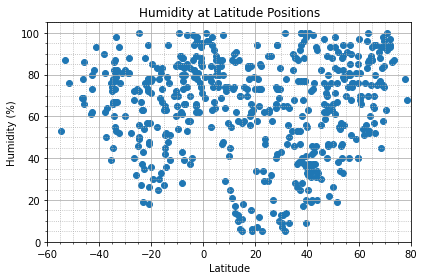

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

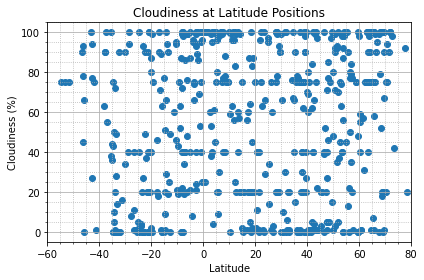

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

## Latitude vs. Wind Speed Plot

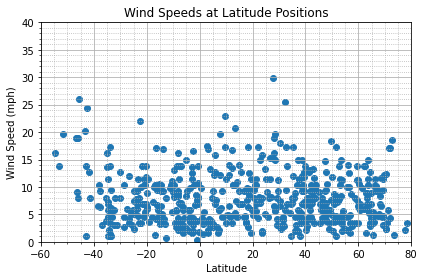

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

## Linear Regression

In [23]:
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")

NameError: name 'st' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression